In [5]:
import pandas as pd

#read the netflix data
df = pd.read_csv(r'C:\Users\Thoma\Desktop\Coding\netflix-report\CONTENT_INTERACTION\ViewingActivity.csv')

#show the number of rows and columns
df.shape

(28555, 10)

In [6]:
#show the first few rows of data
df.head()

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,K-Dawg,2022-01-02 16:26:14,00:09:28,Autoplayed: user action: None;,Outlander: Season 2: La Dame Blanche (Episode 4),NaN,LG DTV 2021 MTK LM21A UHD TV Smart TV,00:28:07,00:28:07,CY (Cyprus)
1,K-Dawg,2022-01-01 17:55:16,01:20:24,Autoplayed: user action: Unspecified;,Jack Reacher,NaN,LG DTV 2021 MTK LM21A UHD TV Smart TV,01:20:25,01:20:25,CY (Cyprus)
2,K-Dawg,2022-01-01 17:54:40,00:00:01,Autoplayed: user action: None;,The Girl in the Yellow Jumper,NaN,LG DTV 2021 MTK LM21A UHD TV Smart TV,00:00:01,00:00:01,CY (Cyprus)
3,K-Dawg,2021-12-31 13:42:15,00:16:43,NaN,Outlander: Season 2: La Dame Blanche (Episode 4),NaN,LG DTV 2021 MTK LM21A UHD TV Smart TV,00:18:40,Not latest view,CY (Cyprus)
4,K-Dawg,2021-12-31 13:41:46,00:00:04,NaN,Outlander: Season 2: Not in Scotland Anymore (...,NaN,LG DTV 2021 MTK LM21A UHD TV Smart TV,00:00:04,00:00:04,CY (Cyprus)


In [7]:
#remove columns we are not interested in
df = df.drop(['Attributes', 'Supplemental Video Type', 'Device Type', 'Bookmark','Latest Bookmark'],axis=1)

df.head()

,Profile Name,Start Time,Duration,Title,Country
0,K-Dawg,2022-01-02 16:26:14,00:09:28,Outlander: Season 2: La Dame Blanche (Episode 4),CY (Cyprus)
1,K-Dawg,2022-01-01 17:55:16,01:20:24,Jack Reacher,CY (Cyprus)
2,K-Dawg,2022-01-01 17:54:40,00:00:01,The Girl in the Yellow Jumper,CY (Cyprus)
3,K-Dawg,2021-12-31 13:42:15,00:16:43,Outlander: Season 2: La Dame Blanche (Episode 4),CY (Cyprus)
4,K-Dawg,2021-12-31 13:41:46,00:00:04,Outlander: Season 2: Not in Scotland Anymore (...,CY (Cyprus)


In [8]:
#determine the format of the data
df.dtypes

Profile Name    object
Start Time      object
Duration        object
Title           object
Country         object
dtype: object

In [9]:
#since these are all stored as objects/strings, we need to change start time and duration to their correct data types
df['Start Time'] = pd.to_datetime(df['Start Time'], utc=True)
df.dtypes

Profile Name                 object
Start Time      datetime64[ns, UTC]
Duration                     object
Title                        object
Country                      object
dtype: object

In [10]:
#to convert the start time into our local timezone, we first need to convert it to an index
df = df.set_index('Start Time')

#then we convert the index to our local time
df.index = df.index.tz_convert('Europe/Nicosia')

#then we convert the index back into a column so it's easier to work with
df = df.reset_index()

df.head()

,Start Time,Profile Name,Duration,Title,Country
0,2022-01-02 18:26:14+02:00,K-Dawg,00:09:28,Outlander: Season 2: La Dame Blanche (Episode 4),CY (Cyprus)
1,2022-01-01 19:55:16+02:00,K-Dawg,01:20:24,Jack Reacher,CY (Cyprus)
2,2022-01-01 19:54:40+02:00,K-Dawg,00:00:01,The Girl in the Yellow Jumper,CY (Cyprus)
3,2021-12-31 15:42:15+02:00,K-Dawg,00:16:43,Outlander: Season 2: La Dame Blanche (Episode 4),CY (Cyprus)
4,2021-12-31 15:41:46+02:00,K-Dawg,00:00:04,Outlander: Season 2: Not in Scotland Anymore (...,CY (Cyprus)


In [12]:
#now we need to conver the duration to a length of time that python understands
df['Duration'] = pd.to_timedelta(df['Duration'])

df.head()

df.dtypes

Start Time      datetime64[ns, Europe/Nicosia]
Profile Name                            object
Duration                       timedelta64[ns]
Title                                   object
Country                                 object
dtype: object

In [22]:
#Now we can start to analyse the data. Let's start by creating a dataset for Outlander
outlander = df[df['Title'].str.contains(('Outlander'), regex=False)]

outlander.sample(20)

,Start Time,Profile Name,Duration,Title,Country
22782,2020-05-25 00:00:15+03:00,Nic,0 days 00:00:03,Outlander,GB (United Kingdom)
4,2021-12-31 15:41:46+02:00,K-Dawg,0 days 00:00:04,Outlander: Season 2: Not in Scotland Anymore (...,CY (Cyprus)
3,2021-12-31 15:42:15+02:00,K-Dawg,0 days 00:16:43,Outlander: Season 2: La Dame Blanche (Episode 4),CY (Cyprus)
108,2021-11-29 22:45:52+02:00,K-Dawg,0 days 00:17:53,Outlander: Season 1: The Way Out (Episode 3),GR (Greece)
111,2021-11-29 21:44:33+02:00,K-Dawg,0 days 00:00:12,Outlander: Season 2: Not in Scotland Anymore (...,GR (Greece)
1717,2020-03-21 09:00:37+02:00,K-Dawg,0 days 00:52:53,Outlander: Season 1: Wentworth Prison (Episode...,HK (Hong Kong)
5,2021-12-31 15:41:31+02:00,K-Dawg,0 days 00:00:03,Outlander: Season 1: Lallybroch (Episode 12),CY (Cyprus)
104,2021-12-10 15:12:15+02:00,K-Dawg,0 days 00:47:09,Outlander: Season 1: The Garrison Commander (E...,CY (Cyprus)
105,2021-12-07 20:36:58+02:00,K-Dawg,0 days 00:54:14,Outlander: Season 1: Rent (Episode 5),CY (Cyprus)
26979,2021-12-30 22:59:39+02:00,T-Bone,0 days 00:00:01,Outlander: Season 1: Sassenach (Episode 1),CY (Cyprus)


In [25]:
#let's remove anything that's just a preview and not someone actually watching the episode
outlander = outlander[(outlander['Duration'] > '0 days 00:00:05')]
outlander.sample(5)
outlander.shape

(16, 5)

In [26]:
#how long have we watched outlander for
outlander['Duration'].sum()

Timedelta('0 days 07:16:41')

In [27]:
#create columns for the week day and hour of day we start watching outlander
outlander['weekday'] = outlander['Start Time'].dt.weekday
outlander['hour'] = outlander['Start Time'].dt.hour
outlander.head()

,Start Time,Profile Name,Duration,Title,Country,weekday,hour
0,2022-01-02 18:26:14+02:00,K-Dawg,0 days 00:09:28,Outlander: Season 2: La Dame Blanche (Episode 4),CY (Cyprus),6,18
3,2021-12-31 15:42:15+02:00,K-Dawg,0 days 00:16:43,Outlander: Season 2: La Dame Blanche (Episode 4),CY (Cyprus),4,15
104,2021-12-10 15:12:15+02:00,K-Dawg,0 days 00:47:09,Outlander: Season 1: The Garrison Commander (E...,CY (Cyprus),4,15
105,2021-12-07 20:36:58+02:00,K-Dawg,0 days 00:54:14,Outlander: Season 1: Rent (Episode 5),CY (Cyprus),1,20
106,2021-12-07 20:22:08+02:00,K-Dawg,0 days 00:13:34,Outlander: Season 1: The Gathering (Episode 4),CY (Cyprus),1,20


In [28]:
#import matplotlib so we can visualise the data
%matplotlib inline
import matplotlib

<AxesSubplot:title={'center':'Outlander episodes watched by day Monday-Sunday'}>

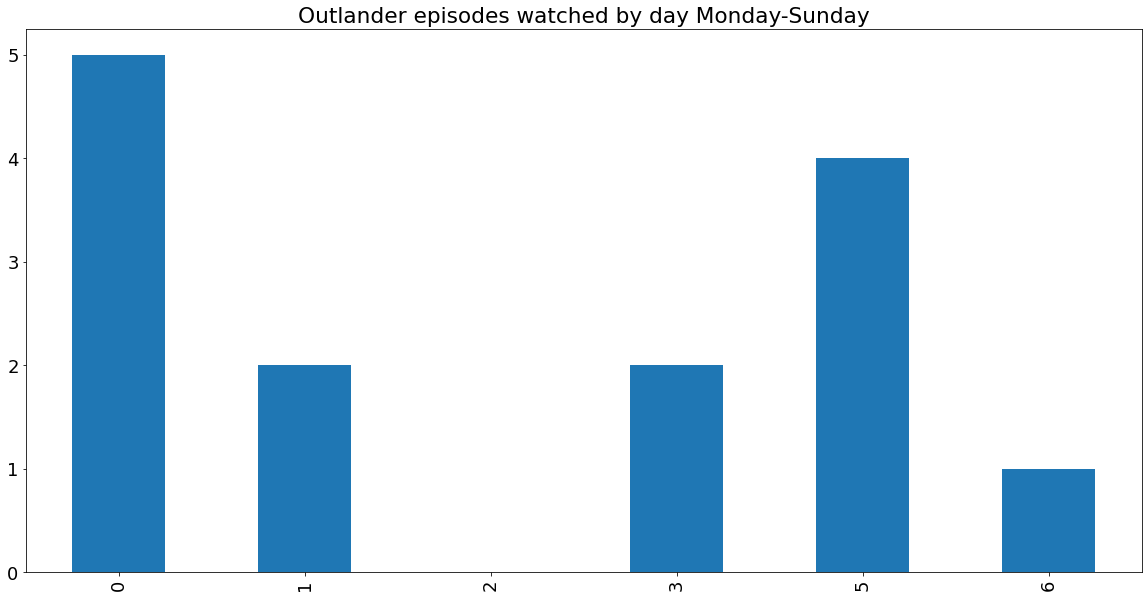

In [34]:
#what does my viewing pattern look like by weekday

#this sets our weekday categories, and then orders them Mon-Sun
outlander['weekday'] = pd.Categorical(outlander['weekday'],categories = [0,1,2,3,5,6], ordered=True)

#assign outlander viewing to specific days, creating an index for outlander by day of the week
outlander_by_day = outlander['weekday'].value_counts()

#sort the index
outlander_by_day = outlander_by_day.sort_index()

#update font size so it's easier to read
matplotlib.rcParams.update({'font.size': 18})

#plot the data in a bar chart
outlander_by_day.plot(kind='bar',figsize=(20,10), title="Outlander episodes watched by day Monday-Sunday")

<AxesSubplot:title={'center':'Outlander episodes watched by hour of day'}>

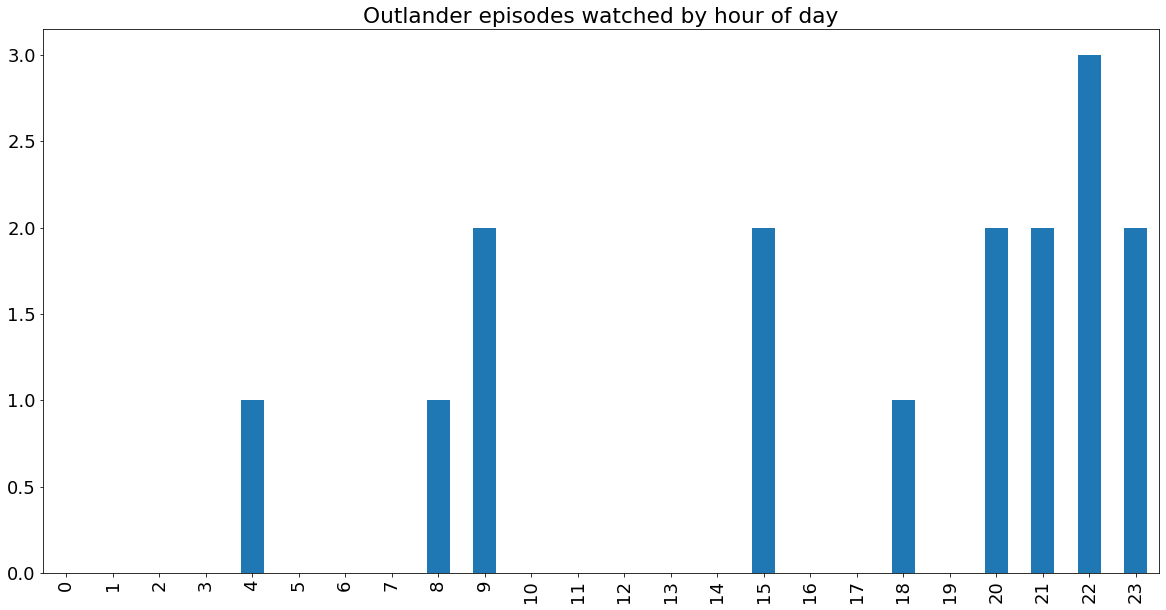

In [36]:
#set categories for hourly basis
outlander['hour'] = pd.Categorical(outlander['hour'], categories = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],
    ordered=True)

#create outlander by hour
outlander_by_hour = outlander['hour'].value_counts()

#sort the index
outlander_by_hour = outlander_by_hour.sort_index()

#update font size so it's easier to read
matplotlib.rcParams.update({'font.size': 18})

#plot the data in a bar chart
outlander_by_hour.plot(kind='bar',figsize=(20,10), title="Outlander episodes watched by hour of day")

In [37]:
#Now we can start to analyse the data. Let's start by creating a dataset for K-Dawg
kdawg = df[df['Profile Name'].str.contains(('K-Dawg'), regex=False)]

kdawg.sample(20)

,Start Time,Profile Name,Duration,Title,Country
1520,2020-08-07 09:48:12+03:00,K-Dawg,0 days 00:21:40,Friends: Season 6: The One with Ross's Teeth (...,GB (United Kingdom)
4869,2017-04-28 12:47:04+03:00,K-Dawg,0 days 00:42:30,Once Upon a Time: Season 3: The Heart of the T...,GB (United Kingdom)
901,2021-01-30 19:48:49+02:00,K-Dawg,0 days 00:21:22,Schitt's Creek: Season 3: Sebastien Raine (Epi...,GB (United Kingdom)
986,2021-01-14 21:23:05+02:00,K-Dawg,0 days 00:00:02,A Man Apart,GB (United Kingdom)
6703,2014-12-23 14:22:29+02:00,K-Dawg,0 days 00:42:36,Suits: Season 1: Errors and Omissions (Episode 2),GB (United Kingdom)
6240,2015-11-23 23:27:56+02:00,K-Dawg,0 days 00:41:56,Narcos: Season 1: La Gran Mentira (Episode 8),GB (United Kingdom)
5420,2016-11-17 20:40:29+02:00,K-Dawg,0 days 00:00:15,"The Good Wife: Season 4: Don't Haze Me, Bro (E...",GB (United Kingdom)
6606,2015-02-06 23:36:59+02:00,K-Dawg,0 days 00:00:02,Brooklyn Nine-Nine: Season 1: Pilot (Episode 1),GB (United Kingdom)
4501,2017-08-01 01:08:30+03:00,K-Dawg,0 days 00:39:58,Jane The Virgin: Season 3: Chapter Sixty-Three...,GB (United Kingdom)
2798,2019-03-05 22:58:46+02:00,K-Dawg,0 days 00:16:44,Suits: Season 8: Harvey (Episode 16),GB (United Kingdom)


In [44]:
#let's remove anything that's not 2021
kdawg = kdawg[(kdawg['Start Time'] > '2020-12-31 23:59:59+02:00')]
kdawg = kdawg[(kdawg['Duration'] > '0 days 00:00:05')]
kdawg.sample(5)

,Start Time,Profile Name,Duration,Title,Country,month
274,2021-09-18 18:55:45+03:00,K-Dawg,0 days 00:26:39,Grace and Frankie: Season 4: The Rats (Episode...,CY (Cyprus),9
654,2021-06-05 13:39:34+03:00,K-Dawg,0 days 00:22:10,Friends: Season 4: The One with the Wedding Dr...,CY (Cyprus),6
113,2021-11-29 20:30:56+02:00,K-Dawg,0 days 00:50:57,Narcos: Mexico: Season 3: Los Juniors (Episode 3),GR (Greece),11
531,2021-07-31 15:33:17+03:00,K-Dawg,0 days 00:03:54,Workin' Moms: Season 4: Bad Reputation (Episod...,CY (Cyprus),7
362,2021-09-11 12:21:04+03:00,K-Dawg,0 days 00:29:07,Grace and Frankie: Season 2: The Boar (Episode 7),CY (Cyprus),9


In [45]:
#how long has K-dawg watched Netflix for in 2021
kdawg['Duration'].sum()

Timedelta('15 days 02:30:52')

In [57]:
#create columns for the months k-dawg has watched netflix for
kdawg['month'] = kdawg['Start Time'].dt.month
kdawg.sample(20)

,Start Time,Profile Name,Duration,Title,Country,month
106,2021-12-07 20:22:08+02:00,K-Dawg,0 days 00:13:34,Outlander: Season 1: The Gathering (Episode 4),CY (Cyprus),12
158,2021-11-12 18:53:14+02:00,K-Dawg,0 days 00:19:03,Grace and Frankie: Season 7: The Circumcision ...,CY (Cyprus),11
76,2021-12-17 21:53:57+02:00,K-Dawg,0 days 00:45:22,You: Season 3: Hands Across Madre Linda (Episo...,GB (United Kingdom),12
317,2021-09-14 12:49:12+03:00,K-Dawg,0 days 00:12:07,Grace and Frankie: Season 4: The Scavengender ...,CY (Cyprus),9
726,2021-04-01 21:48:51+03:00,K-Dawg,0 days 00:00:25,The Irregulars: Season 1: Chapter Two: The Gho...,GB (United Kingdom),4
881,2021-02-03 21:31:23+02:00,K-Dawg,0 days 00:21:34,Schitt's Creek: Season 4: The Rollout (Episode...,GB (United Kingdom),2
722,2021-04-10 08:21:36+03:00,K-Dawg,0 days 00:20:44,Friends: Season 10: The One with Ross's Grant ...,GB (United Kingdom),4
432,2021-08-27 06:38:27+03:00,K-Dawg,0 days 00:22:43,Friends: Season 1: The One with All the Poker ...,GB (United Kingdom),8
224,2021-10-17 21:12:34+03:00,K-Dawg,0 days 00:41:40,Good Girls: Season 4: Grandma Loves Grisham (E...,CY (Cyprus),10
955,2021-01-17 00:19:00+02:00,K-Dawg,0 days 00:22:47,Friends: Season 9: The One with the Pediatrici...,GB (United Kingdom),1


<AxesSubplot:title={'center':'Number of episodes started each month Jan-Dec'}>

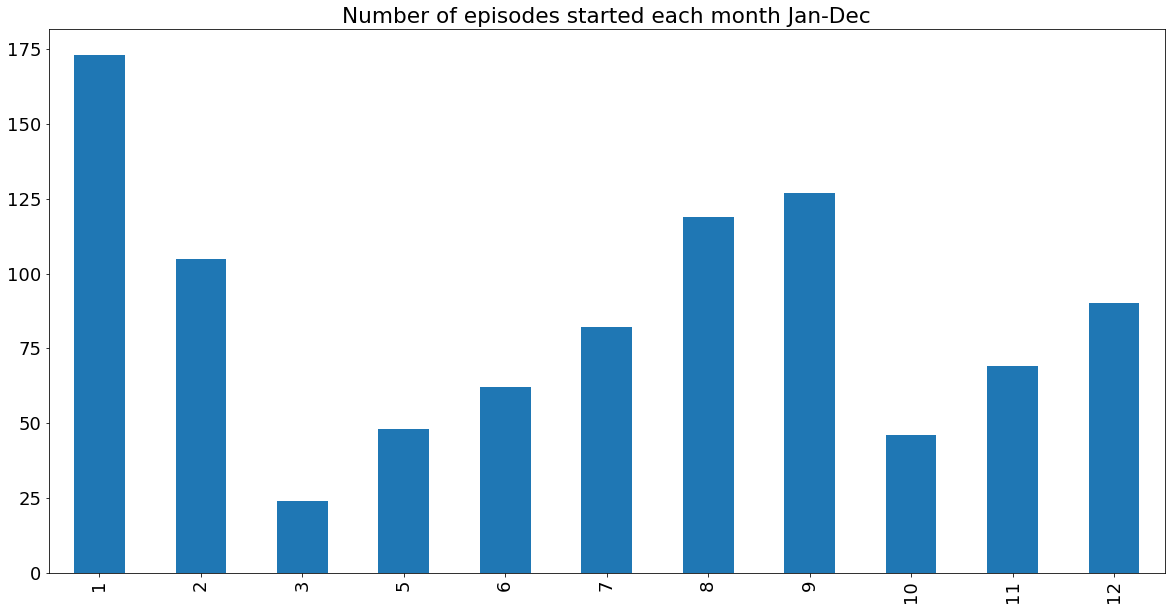

In [59]:
#what does kdawgs viewing pattern look like by month

#this sets our monthly categories as an index, and then orders them
kdawg['month'] = pd.Categorical(kdawg['month'],categories = [1,2,3,5,6,7,8,9,10,11,12], ordered=True)

#assign kdawg viewing to specific months, creating an index for kdawg by month
kdawg_by_month = kdawg['month'].value_counts()

#sort the index
kdawg_by_month = kdawg_by_month.sort_index()

#update font size so it's easier to read
matplotlib.rcParams.update({'font.size': 18})

#plot the data in a bar chart
kdawg_by_month.plot(kind='bar',figsize=(20,10), title="Number of episodes started each month Jan-Dec")

In [58]:
kdawg_by_month = kdawg['month'].value_counts()
kdawg_by_month.head()

1     173
9     127
8     119
2     105
12     90
Name: month, dtype: int64